# Data Exploration: Brazil Real Estate Listings
The complete dataset can be downloaded from https://data.world/properati/real-estate-listings-brazil

It comes in two files that are collectively less than 1 GB in size. Downloading the dataset should be relatively pain-free. Additionally, credits go to Properati for this public dataset.

Real Estate is a subject of interest for me because it is a tried, tested, and trusted passive investment vehicle that many a great financial thinker swear by. 

## "Brazil Real Estate Listings and Neural Networks with Keras" 
This notebook will detail a very short study into the Brazil Real Estate Listings dataset. In essence, the structure is as follows:
1. Data Pre-processing
    This includes identifying relevant features and removing irrelevant features. This is where the majority of Data Scrubbing will be done.
2. Data Visualization
    Here, we will try to give a face to the numbers included in the dataset. One major part of Data Visualization includes plotting the properties on the map of Brazil to identify the concentration of properties per area.
3. Feature Engineering
    We will use Tensorflow's built in methods to create feature columns. This will be useful in the experimentation phase when we will start to feed it to different neural networks.
4. Experimentation
     We will experiment with serveral different set-ups to observe behavior. From here, we will be able to come up with ideas of what's important to look at.

In [1]:
# import all packages here. 
# remember to activate the virtual environment.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import math
import datetime
from collections import Counter
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import tensorflow_docs as tfdocs

### Initial inferences
Before scrubbing the data, we have to identify what features seem relevant. Unneccesary data will only result to data pollution.

In [2]:
raw_data_sell = pd.read_csv('properati-BR-2016-11-01-properties-sell.csv')
raw_data_sell.loc[50:55,:]

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50,2013-04-25,sell,house,Jundiaí,|Brasil|São Paulo|Jundiaí|,NaN,NaN,NaN,NaN,480000.0,...,NaN,NaN,NaN,NaN,4.0,NaN,http://jundiai.properati.com.br/qdb_vende-se_c...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,https://thumbs-cf.properati.com/5/53DNhjrNMe3Q...
51,2013-04-25,sell,house,Jundiaí,|Brasil|São Paulo|Jundiaí|,NaN,NaN,NaN,NaN,425000.0,...,NaN,NaN,NaN,NaN,4.0,NaN,http://jundiai.properati.com.br/qdc_vende-se_c...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,NaN
52,2013-04-25,sell,house,Jundiaí,|Brasil|São Paulo|Jundiaí|,NaN,NaN,NaN,NaN,650000.0,...,NaN,NaN,NaN,NaN,3.0,NaN,http://jundiai.properati.com.br/qdq_vende-se_c...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,NaN
53,2013-04-25,sell,house,Jardim Caçula,|Brasil|São Paulo|Jundiaí|Jardim Caçula|,NaN,NaN,NaN,NaN,400000.0,...,NaN,NaN,NaN,NaN,3.0,NaN,http://jardim-cacula.properati.com.br/qds_vend...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,https://thumbs-cf.properati.com/1/pBtX380kYh9a...
54,2013-04-25,sell,house,Jundiaí,|Brasil|São Paulo|Jundiaí|,NaN,NaN,NaN,NaN,742000.0,...,NaN,NaN,NaN,NaN,3.0,NaN,http://jundiai.properati.com.br/qdu_vende-se_c...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,https://thumbs-cf.properati.com/8/oYFP2YnKd2e0...
55,2013-04-25,sell,house,Jundiaí,|Brasil|São Paulo|Jundiaí|,NaN,NaN,NaN,NaN,650000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://jundiai.properati.com.br/qdv_vende-se_c...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Jundiai,https://thumbs-cf.properati.com/2/tes1wfia_iOy...


In [3]:
raw_data_rent = pd.read_csv('properati-BR-2016-11-01-properties-rent.csv')
raw_data_rent.loc[50:55,:]

,created_on,operation,property_type,place_name,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
50,2013-05-16,rent,store,Alphaville,|Brasil|São Paulo|Barueri|Alphaville|,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,http://alphaville-barueri.properati.com.br/2y0...,"Otimo Imovel com o melhor valor da regiao, con...",Sala Comercial Em Barueri,NaN
51,2013-05-16,rent,house,Riviera de São Lourenço,|Brasil|São Paulo|Bertioga|Riviera de São Lour...,NaN,NaN,NaN,NaN,2700.0,...,NaN,NaN,NaN,NaN,4.0,NaN,http://riviera-de-sao-lourenco.properati.com.b...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Condomínio Em Bertioga,NaN
52,2013-05-16,rent,house,Guarujá,|Brasil|São Paulo|Guarujá|,NaN,NaN,NaN,NaN,2500.0,...,NaN,NaN,NaN,NaN,4.0,NaN,http://guaruja.properati.com.br/30xc_vende-se_...,"Otimo Imovel com o melhor valor da regiao, con...",Casa Em Guaruja,NaN
53,2013-05-16,rent,store,Olímpico,|Brasil|São Paulo|São Caetano do Sul|Olímpico|,NaN,NaN,NaN,NaN,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://olimpico.properati.com.br/330d_aluga-se...,"Otimo Imovel com o melhor valor da regiao, con...",Sala Comercial Em Sao Caetano Do Sul,NaN
54,2013-05-16,rent,house,Olímpico,|Brasil|São Paulo|São Caetano do Sul|Olímpico|,NaN,NaN,NaN,NaN,12000.0,...,NaN,NaN,NaN,NaN,4.0,NaN,http://olimpico.properati.com.br/33l3_aluga-se...,"Otimo Imovel com o melhor valor da regiao, con...",Sobrado Em Sao Caetano Do Sul,NaN
55,2013-05-16,rent,store,Santo Antônio,|Brasil|São Paulo|São Caetano do Sul|Santo Ant...,NaN,NaN,NaN,NaN,4800.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://santo-antonio-sao-caetano-do-sul.proper...,"Otimo Imovel com o melhor valor da regiao, con...",Salão Em Sao Caetano Do Sul,NaN


So, based on the initial assesment, we have this tentative list of features:

1. created_on
2. operation
3. property_type
4. place_name
5. lat-lon
6. lat
7. lon
8. price
9. surface_covered_in_m2
10. price_usd_per_m2
11. price_per_m2
12. floor
13. rooms
14. expenses

### Data Scrubbing
Upon initial inspection of the data tables, there are many null entries where location is concerned. So, we will remove all the unnecessary features mentioned above, then only take the rows with complete information.

In [4]:
data_sell = pd.DataFrame()
features = ['created_on',
             'operation',
             'property_type',
             'place_name',
             'lat-lon',
             'lat',
             'lon',
             'price',
             'surface_covered_in_m2',
             'price_usd_per_m2',
             'price_per_m2',
             'rooms',
             'expenses'
            ]
data_sell = raw_data_sell.loc[:,features]

In [5]:
data_sell

,created_on,operation,property_type,place_name,lat-lon,lat,lon,price,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
0,2013-04-25,sell,apartment,Mondubim,NaN,NaN,NaN,155900.0,NaN,NaN,NaN,2.0,NaN
1,2013-04-25,sell,house,Manhuaçu,NaN,NaN,NaN,950000.0,NaN,NaN,NaN,NaN,NaN
2,2013-04-25,sell,house,Ibatiba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-04-25,sell,apartment,Manhuaçu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-04-25,sell,apartment,Manhuaçu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872667,2016-11-01,sell,apartment,Barra da Tijuca,"-23.009399,-43.317394",-23.009399,-43.317394,2200000.0,105.0,6538.220286,20952.380952,2.0,2450.0
872668,2016-11-01,sell,apartment,Itaquera,NaN,NaN,NaN,210000.0,58.0,1129.841207,3620.689655,1.0,300.0
872669,2016-11-01,sell,house,São Paulo,NaN,NaN,NaN,480000.0,270.0,554.758074,1777.777778,2.0,NaN
872670,2016-11-01,sell,house,Vila Ré,NaN,NaN,NaN,600000.0,110.0,1702.098636,5454.545455,1.0,NaN


In [6]:
# drop entries with null values
data_sell = data_sell[data_sell.lat.notnull()]
data_sell = data_sell[data_sell.lon.notnull()]
data_sell = data_sell[data_sell.price.notnull()]
data_sell = data_sell[data_sell.expenses.notnull()]
data_sell = data_sell[data_sell.price_per_m2.notnull()]
data_sell

,created_on,operation,property_type,place_name,lat-lon,lat,lon,price,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
22056,2014-07-07,sell,apartment,Barra Velha,"-26.633144,-48.684662",-26.633144,-48.684662,120000.0,63.0,601.212540,1904.761905,2.0,130.0
22290,2014-07-13,sell,apartment,São Paulo,"-23.600399,-46.710586",-23.600399,-46.710586,360000.0,70.0,1623.274143,5142.857143,3.0,600.0
37700,2014-11-20,sell,apartment,Campo Belo,"-23.624182,-46.676914",-23.624182,-46.676914,515000.0,50.0,3251.057200,10300.000000,1.0,420.0
37702,2014-11-20,sell,apartment,Jardim Vivendas,"-20.84441,-49.393246",-20.844410,-49.393246,380000.0,112.0,1070.910000,3392.857143,3.0,465.0
37704,2014-11-20,sell,apartment,Green Fields Residence Club,"-20.842413,-49.403404",-20.842413,-49.403404,970000.0,157.0,1950.111656,6178.343949,3.0,650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
872591,2016-10-31,sell,apartment,Vila Jerusalém,"-23.728554,-46.557194",-23.728554,-46.557194,277000.0,65.0,1329.819077,4261.538462,1.0,200.0
872638,2016-10-31,sell,apartment,Piracicaba,"-22.724518,-47.675495",-22.724518,-47.675495,280000.0,63.0,1386.895079,4444.444444,2.0,300.0
872639,2016-10-31,sell,apartment,Piracicaba,"-22.741331,-47.636894",-22.741331,-47.636894,180000.0,48.0,1170.192708,3750.000000,1.0,280.0
872640,2016-10-31,sell,apartment,Piracicamirim,"-22.758472,-47.614475",-22.758472,-47.614475,160000.0,50.0,998.564400,3200.000000,1.0,250.0


In [7]:
# rinse and repeat with data for rent.
data_rent = pd.DataFrame()
data_rent = raw_data_rent.loc[:,features]

In [8]:
data_rent

,created_on,operation,property_type,place_name,lat-lon,lat,lon,price,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
0,2013-04-25,rent,apartment,Praia Grande,NaN,NaN,NaN,900.0,NaN,NaN,NaN,1.0,NaN
1,2013-04-25,rent,apartment,Alphaville,NaN,NaN,NaN,3200.0,NaN,NaN,NaN,3.0,NaN
2,2013-04-25,rent,house,Centro,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,2.0,NaN
3,2013-04-25,rent,apartment,Alphaville,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-04-25,rent,apartment,Barueri,NaN,NaN,NaN,1800.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97348,2016-11-01,rent,apartment,Vila Adyana,NaN,NaN,NaN,1600.0,NaN,NaN,NaN,NaN,NaN
97349,2016-11-01,rent,apartment,Jardim Aquárius,NaN,NaN,NaN,2000.0,NaN,NaN,NaN,NaN,NaN
97350,2016-11-01,rent,apartment,Jardim Aquárius,NaN,NaN,NaN,1900.0,NaN,NaN,NaN,NaN,NaN
97351,2016-11-01,rent,apartment,Votorantim,NaN,NaN,NaN,900.0,NaN,NaN,NaN,1.0,301.0


In [9]:
# drop entries with no lat and lon
# drop entries with no price
data_rent = data_rent[data_rent.lat.notnull()]
data_rent = data_rent[data_rent.lon.notnull()]
data_rent = data_rent[data_rent.price.notnull()]
data_rent = data_rent[data_rent.expenses.notnull()]
data_rent = data_rent[data_rent.price_per_m2.notnull()]
data_rent

,created_on,operation,property_type,place_name,lat-lon,lat,lon,price,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
2968,2014-11-20,rent,apartment,São Paulo,"-23.63019,-46.691612",-23.630190,-46.691612,1900.0,90.0,6.663333,21.111111,2.0,1100.0
2969,2014-11-20,rent,apartment,Brooklin,"-23.612671,-46.691189",-23.612671,-46.691189,3100.0,45.0,21.743778,68.888889,1.0,480.0
2973,2014-11-20,rent,apartment,São José do Rio Preto,"-20.77014,-49.372932",-20.770140,-49.372932,550.0,50.0,3.472000,11.000000,2.0,107.0
3259,2014-12-23,rent,apartment,Parque Residencial Aquarius,"-23.222439,-45.908871",-23.222439,-45.908871,1600.0,75.0,6.733467,21.333333,3.0,390.0
3260,2014-12-24,rent,apartment,Parque Residencial Aquarius,"-23.21682,-45.904377",-23.216820,-45.904377,1300.0,87.0,4.716322,14.942529,2.0,500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97326,2016-10-31,rent,store,Jardim Vergueiro,"-23.5116,-47.4613",-23.511600,-47.461300,1500.0,16.0,29.254375,93.750000,1.0,300.0
97341,2016-10-31,rent,apartment,Vila Rezende,"-22.706222,-47.6609502",-22.706222,-47.660950,700.0,70.0,3.120429,10.000000,1.0,450.0
97342,2016-10-31,rent,apartment,Piracicaba,"-22.682171,-47.682106",-22.682171,-47.682106,550.0,57.0,3.010877,9.649123,1.0,180.0
97343,2016-10-31,rent,apartment,Centro,"-22.722618,-47.651722",-22.722618,-47.651722,450.0,38.0,3.695263,11.842105,NaN,500.0


### So far, I am almost satisfied with the reduction of both data frames. Let's see how it will do when thrown into a simple 2 dimensional graph.

To start, let's do a simple plot detailing price VS expenses.

In [10]:
# start with listings for SELL
x = data_sell.loc[:,'price']
x = x.sort_values(ascending=True)
x = x.to_numpy()

y = data_sell.loc[:,'expenses']
y = y.sort_values(ascending=True)
y = y.to_numpy()

<Figure size 432x288 with 0 Axes>

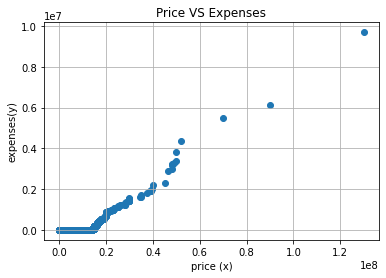

In [11]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(x,y)

ax.set(xlabel='price (x)', ylabel='expenses(y)',
       title='Price VS Expenses')
ax.grid()

plt.show()

OK so this is quite obvious. The more expensive a piece of real estate is, the higher the property tax, maintenance, etc. Overall, more expenses to come for the land owners.

In [12]:
# listings for RENT
x = data_rent.loc[:,'price']
x = x.sort_values(ascending=True)
x = x.to_numpy()

y = data_rent.loc[:,'expenses']
y = y.sort_values(ascending=True)
y = y.to_numpy()

In [13]:
x

array([   350.,    370.,    400., ..., 240000., 298000., 300000.])

In [14]:
y

array([1.0000e+00, 1.0000e+00, 1.0000e+00, ..., 2.7000e+04, 6.7105e+04,
       8.5000e+05])

<Figure size 432x288 with 0 Axes>

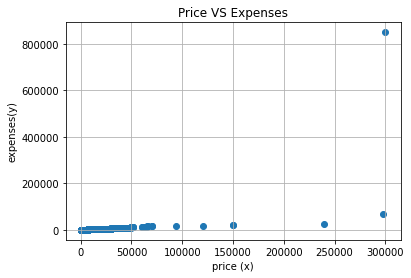

In [15]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(x,y)

ax.set(xlabel='price (x)', ylabel='expenses(y)',
       title='Price VS Expenses')
ax.grid()

plt.show()

Whoa there. That last entry looks like an extreme outlier. Let's see what the values are:

In [16]:
x[100:200]

array([550., 550., 550., 550., 550., 550., 550., 550., 550., 550., 550.,
       550., 550., 550., 550., 550., 556., 560., 560., 560., 580., 580.,
       580., 580., 580., 580., 580., 580., 580., 580., 590., 590., 590.,
       590., 590., 590., 593., 600., 600., 600., 600., 600., 600., 600.,
       600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
       600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
       600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
       600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
       600., 600., 600., 600., 600., 600., 600., 600., 600., 600., 600.,
       600.])

In [17]:
y[100:200]

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 54., 55., 55., 56., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60., 60.,
       60., 60., 60., 60., 60., 60., 60., 65., 70., 70., 70., 70., 70.,
       70., 70., 70., 70., 70., 70., 70., 70., 70.])

Okay, so for RENTALS, apparently there are a lot of REPEAT elements. Let's see which elements occur the most:

In [18]:
price = Counter(x)
print(price.most_common(20))

[(1500.0, 595), (2000.0, 542), (2500.0, 488), (1200.0, 486), (1000.0, 466), (3000.0, 452), (1300.0, 432), (1800.0, 425), (3500.0, 420), (1100.0, 387), (800.0, 337), (4000.0, 329), (1600.0, 327), (900.0, 322), (1700.0, 311), (2200.0, 292), (5000.0, 287), (1400.0, 279), (4500.0, 272), (6000.0, 231)]


In [19]:
expenses = Counter(y)
print(expenses.most_common(20))

[(500.0, 327), (600.0, 326), (400.0, 308), (300.0, 283), (350.0, 262), (700.0, 246), (450.0, 240), (800.0, 232), (1000.0, 190), (650.0, 184), (1200.0, 184), (1100.0, 175), (550.0, 174), (900.0, 172), (380.0, 153), (1500.0, 152), (750.0, 135), (250.0, 124), (1300.0, 122), (200.0, 120)]


And the least popular prices and expenses:

In [20]:
price_inverted = list(reversed(price.most_common()))

In [21]:
print(price_inverted[0:20])

[(300000.0, 1), (298000.0, 1), (240000.0, 1), (120000.0, 1), (94300.0, 1), (66000.0, 1), (63400.0, 1), (63000.0, 1), (51177.0, 1), (47833.0, 1), (47000.0, 1), (45500.0, 1), (43200.0, 1), (41000.0, 1), (37920.0, 1), (34500.0, 1), (32400.0, 1), (31000.0, 1), (29804.0, 1), (29500.0, 1)]


In [22]:
expenses_inverted = list(reversed(expenses.most_common()))

In [23]:
print(expenses_inverted[0:20])

[(850000.0, 1), (67105.0, 1), (27000.0, 1), (23000.0, 1), (21078.0, 1), (17105.0, 1), (17000.0, 1), (14168.0, 1), (13500.0, 1), (13129.0, 1), (13078.0, 1), (10288.0, 1), (10000.0, 1), (9978.0, 1), (9860.0, 1), (9687.0, 1), (9320.0, 1), (9111.0, 1), (8900.0, 1), (8820.0, 1)]


Based on this, we can now spot the difference between the relationship of price to expenses when a property is being sold compared to when it is being rented. 
When it comes to selling properties, the more expensive the listing, the more expensive the long term cost (maintenance, taxes, etc.)
It is a different story when it comes to rentals. With rentals, expenses are kept low probably because the tenants do not have to handle property tax and maintenance. The price of rentals are also exponentially lower than that of properties that are being sold. 

However, this is an incomplete picture of whether or not an investor is better off renting or selling because we have to take LONG TERM COSTS into account. The price versus expenses analysis simply asserts the need to investigate costs over TIME.

With that said, let's analyze the behavior of one property over time. Let's choose the property with the most occurrences. 

In [24]:
name_rent = data_rent.loc[:,['created_on','place_name','price','expenses']]

In [25]:
name_rent

,created_on,place_name,price,expenses
2968,2014-11-20,São Paulo,1900.0,1100.0
2969,2014-11-20,Brooklin,3100.0,480.0
2973,2014-11-20,São José do Rio Preto,550.0,107.0
3259,2014-12-23,Parque Residencial Aquarius,1600.0,390.0
3260,2014-12-24,Parque Residencial Aquarius,1300.0,500.0
...,...,...,...,...
97326,2016-10-31,Jardim Vergueiro,1500.0,300.0
97341,2016-10-31,Vila Rezende,700.0,450.0
97342,2016-10-31,Piracicaba,550.0,180.0
97343,2016-10-31,Centro,450.0,500.0


In [26]:
name_sell = data_sell.loc[:,['created_on','place_name','price','expenses']]

In [27]:
name_sell

,created_on,place_name,price,expenses
22056,2014-07-07,Barra Velha,120000.0,130.0
22290,2014-07-13,São Paulo,360000.0,600.0
37700,2014-11-20,Campo Belo,515000.0,420.0
37702,2014-11-20,Jardim Vivendas,380000.0,465.0
37704,2014-11-20,Green Fields Residence Club,970000.0,650.0
...,...,...,...,...
872591,2016-10-31,Vila Jerusalém,277000.0,200.0
872638,2016-10-31,Piracicaba,280000.0,300.0
872639,2016-10-31,Piracicaba,180000.0,280.0
872640,2016-10-31,Piracicamirim,160000.0,250.0


In [28]:
# let's sort via date.
name_rent = name_rent.sort_values(by='created_on')

In [29]:
name_rent

,created_on,place_name,price,expenses
2968,2014-11-20,São Paulo,1900.0,1100.0
2969,2014-11-20,Brooklin,3100.0,480.0
2973,2014-11-20,São José do Rio Preto,550.0,107.0
3259,2014-12-23,Parque Residencial Aquarius,1600.0,390.0
3260,2014-12-24,Parque Residencial Aquarius,1300.0,500.0
...,...,...,...,...
97277,2016-10-31,Barra da Tijuca,3300.0,1464.0
97276,2016-10-31,Setor Bueno,700.0,400.0
97269,2016-10-31,Setor Negrão de Lima,900.0,268.0
97280,2016-10-31,Ipanema,7800.0,1650.0


In [30]:
name_sell = name_sell.sort_values(by='created_on')

In [31]:
name_sell

,created_on,place_name,price,expenses
22056,2014-07-07,Barra Velha,120000.0,130.0
22290,2014-07-13,São Paulo,360000.0,600.0
37700,2014-11-20,Campo Belo,515000.0,420.0
37702,2014-11-20,Jardim Vivendas,380000.0,465.0
37704,2014-11-20,Green Fields Residence Club,970000.0,650.0
...,...,...,...,...
872443,2016-10-31,Parque Campolim,410000.0,498.0
872444,2016-10-31,Parque Campolim,440000.0,498.0
872453,2016-10-31,Jardim Europa,403848.0,450.0
872411,2016-10-31,Vila Progresso,529000.0,120.0


In [32]:
# finally, let's choose the most common place_name!
name_rent.place_name.mode

<bound method Series.mode of 2968                       São Paulo
2969                        Brooklin
2973           São José do Rio Preto
3259     Parque Residencial Aquarius
3260     Parque Residencial Aquarius
                    ...             
97277                Barra da Tijuca
97276                    Setor Bueno
97269           Setor Negrão de Lima
97280                        Ipanema
97352                     Copacabana
Name: place_name, Length: 14605, dtype: object>

In [33]:
name_sell.place_name.mode

<bound method Series.mode of 22056                     Barra Velha
22290                       São Paulo
37700                      Campo Belo
37702                 Jardim Vivendas
37704     Green Fields Residence Club
                     ...             
872443                Parque Campolim
872444                Parque Campolim
872453                  Jardim Europa
872411                 Vila Progresso
872667                Barra da Tijuca
Name: place_name, Length: 107914, dtype: object>

Alright, so for properties for rent, the most common property is COPACABANA. For properties for selling, it's BARRA DA TIJUCA.

In [34]:
name_rent = name_rent.loc[name_rent['place_name']=='Copacabana']

In [35]:
name_rent

,created_on,place_name,price,expenses
6847,2015-04-09,Copacabana,6000.0,1430.0
35242,2016-03-03,Copacabana,4300.0,694.0
35241,2016-03-03,Copacabana,980.0,573.0
52680,2016-06-16,Copacabana,3200.0,600.0
61110,2016-07-20,Copacabana,8800.0,2000.0
63032,2016-07-28,Copacabana,7000.0,750.0
71707,2016-08-26,Copacabana,16000.0,3550.0
75859,2016-09-14,Copacabana,1800.0,650.0
76756,2016-09-16,Copacabana,1300.0,303.0
77847,2016-09-20,Copacabana,3200.0,600.0


In [36]:
name_sell = name_sell.loc[name_sell['place_name']=='Barra da Tijuca']

In [37]:
name_sell

,created_on,place_name,price,expenses
60982,2015-04-08,Barra da Tijuca,749000.0,620.0
60984,2015-04-08,Barra da Tijuca,1270000.0,890.0
61017,2015-04-08,Barra da Tijuca,1050000.0,350.0
60874,2015-04-08,Barra da Tijuca,610000.0,1000.0
61021,2015-04-08,Barra da Tijuca,1799900.0,1000.0
...,...,...,...,...
869774,2016-10-29,Barra da Tijuca,4500000.0,1100.0
869799,2016-10-29,Barra da Tijuca,720000.0,1100.0
869578,2016-10-29,Barra da Tijuca,1650000.0,1850.0
872164,2016-10-31,Barra da Tijuca,1050000.0,780.0


Our data is ready. Now, we are expecting 4 different graphs:
1. Price vs Time
2. Expenses vs Time

for both Rent and Sell so that makes it 4 in total.

In [38]:
name_rent_date = name_rent.loc[:,['created_on']].to_numpy()
name_rent_price = name_rent.loc[:,['price']].to_numpy()
name_rent_expenses = name_rent.loc[:,['expenses']].to_numpy()

In [39]:
t_rent = list()
for date in name_rent_date:
    t_rent.append(datetime.datetime.strptime(date[0],'%Y-%m-%d').date())

In [40]:
name_sell_date = name_sell.loc[:,['created_on']].to_numpy()
name_sell_price = name_sell.loc[:,['price']].to_numpy()
name_sell_expenses = name_sell.loc[:,['expenses']].to_numpy()

In [41]:
t_sell = list()
for date in name_sell_date:
    t_sell.append(datetime.datetime.strptime(date[0],'%Y-%m-%d').date())

<Figure size 432x288 with 0 Axes>

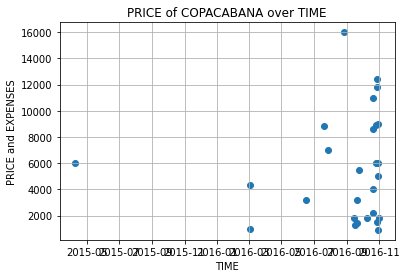

In [42]:
# COPACABANA (rent)
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(t_rent,name_rent_price)
ax.set(xlabel='TIME', ylabel='PRICE and EXPENSES',
       title='PRICE of COPACABANA over TIME')
ax.grid()

plt.show()

<Figure size 432x288 with 0 Axes>

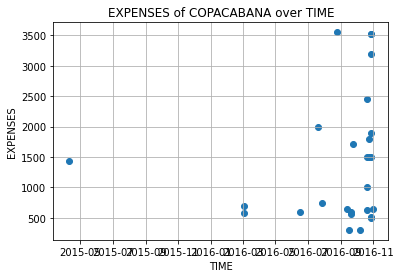

In [43]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(t_rent,name_rent_expenses)

ax.set(xlabel='TIME', ylabel='EXPENSES',
       title='EXPENSES of COPACABANA over TIME')
ax.grid()

plt.show()

<Figure size 432x288 with 0 Axes>

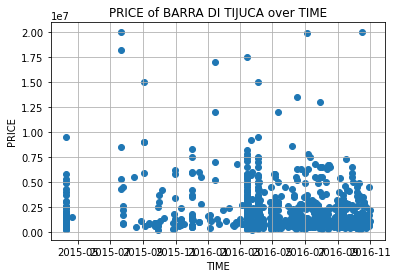

In [44]:
# BARRA DI TIJUCA (sell)
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(t_sell,name_sell_price)

ax.set(xlabel='TIME', ylabel='PRICE',
       title='PRICE of BARRA DI TIJUCA over TIME')
ax.grid()

plt.show()

<Figure size 432x288 with 0 Axes>

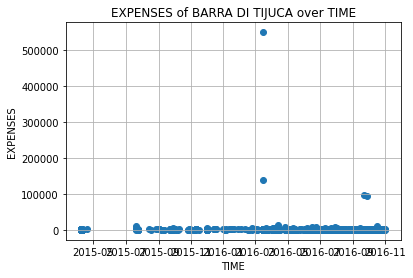

In [45]:
fig = plt.figure()
fig, ax = plt.subplots()
ax.scatter(t_sell,name_sell_expenses)

ax.set(xlabel='TIME', ylabel='EXPENSES',
       title='EXPENSES of BARRA DI TIJUCA over TIME')
ax.grid()

plt.show()

From the graphs, we can infer that certain market conditions need to be factored in to explain the price lows and highs. Both rent and sell exhibit the same behavior.

Hence, this brings us to our next point of analysis. 

### LOCATION
Here we will be testing the "Bid Rent Theory". Profitability is said to be directly influence by location (see first few cells for context). So, let's play with some Geospatial tools.

The shape files were taken from https://data.humdata.org/dataset/brazil-administrative-level-0-boundaries. 
1. At level 0, this is the administrative level (most general)
2. At level 1, this is the state/federal district level
3. Level 2, Municipality/administrative regions
4. Level 3, district level (most specific)

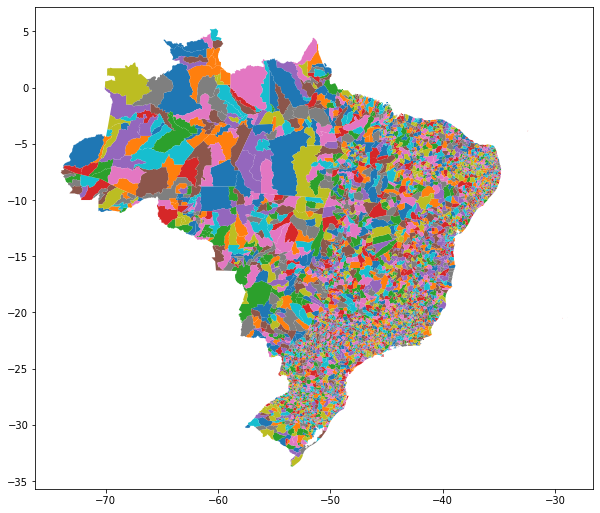

In [106]:
brazil2 = gpd.read_file("bra_adm2/BRA_adm2.shp")
brazil2.plot(figsize=(10,10), column='NAME_2')

Based on our needs, I would wager that we need the shape file for level 2 (municipality). Here we can clearly see which properties are located within more urban and condensed areas. 

Hopefully, we can identify a good justification for the prices and expenses.

In [47]:
gdf_rent = gpd.GeoDataFrame(data_rent, geometry=gpd.points_from_xy(data_rent.lon,data_rent.lat))

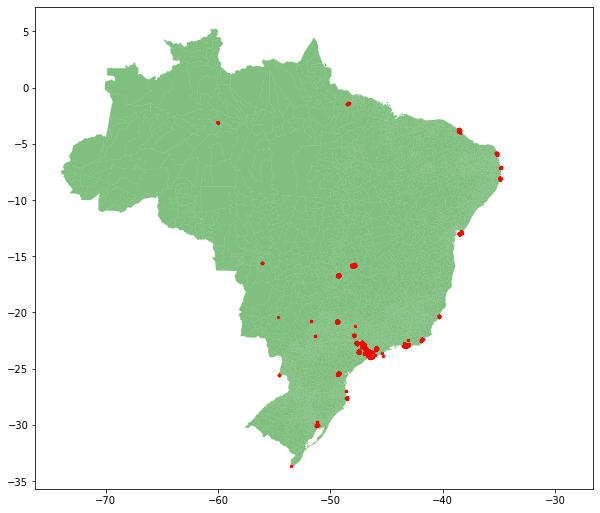

In [48]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_aspect('equal')

brazil2.plot(ax=ax, color='green', alpha=0.5)
gdf_rent.plot(ax=ax, marker='o', color='red', markersize=5)

In [49]:
gdf_sell = gpd.GeoDataFrame(data_sell, geometry=gpd.points_from_xy(data_sell.lon,data_sell.lat))

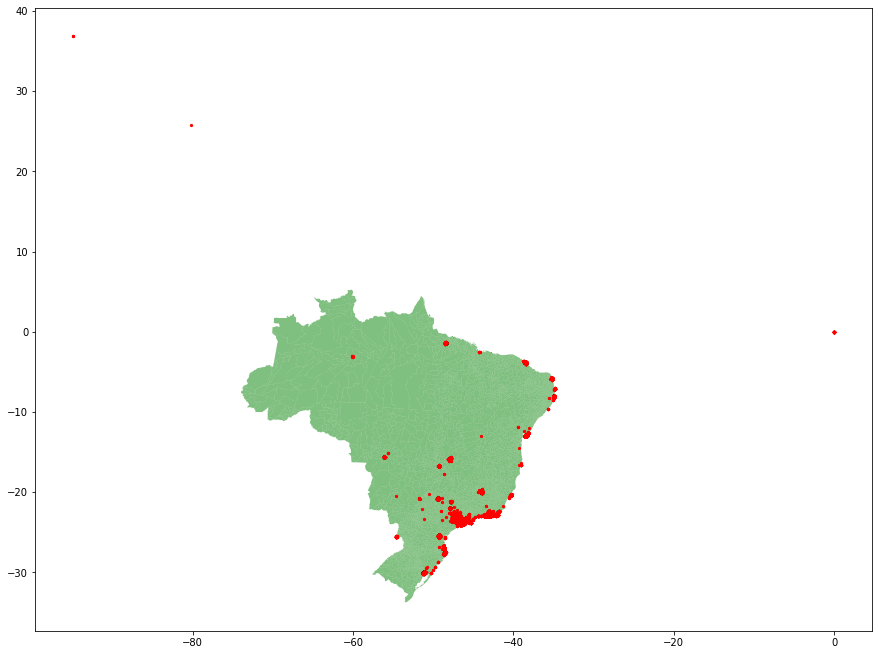

In [50]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_aspect('equal')

brazil2.plot(ax=ax, color='green', alpha=0.5)
gdf_sell.plot(ax=ax, marker='o', color='red', markersize=5)

### Observations
1. Interestingly, for properties for rent everything is strictly within Brazil. However, there are properties for sale OUTSIDE Brazil. These properties are most likely being sold to locals who are interested in international properties.

2. More than that, it seems that the majority of the properties are found in COASTAL areas. From this, we can make an educated guess as to why. Perhaps these coastal areas have great tourism markets (beaches, resorts, etc.) and as such, business owners' most ideal property placement would be there.

3. Are the properties clumped in one area because it is economically more well-off than the rest? Is the poverty index in north western Brazil so bad that no one wants to invest in real estate there? In any case, there is not enough data to conclude. Rather, I would propose the possibility of infusing our initial findings with more data on: Brazil's poverty index, inflation rate, housing demand per municipality.



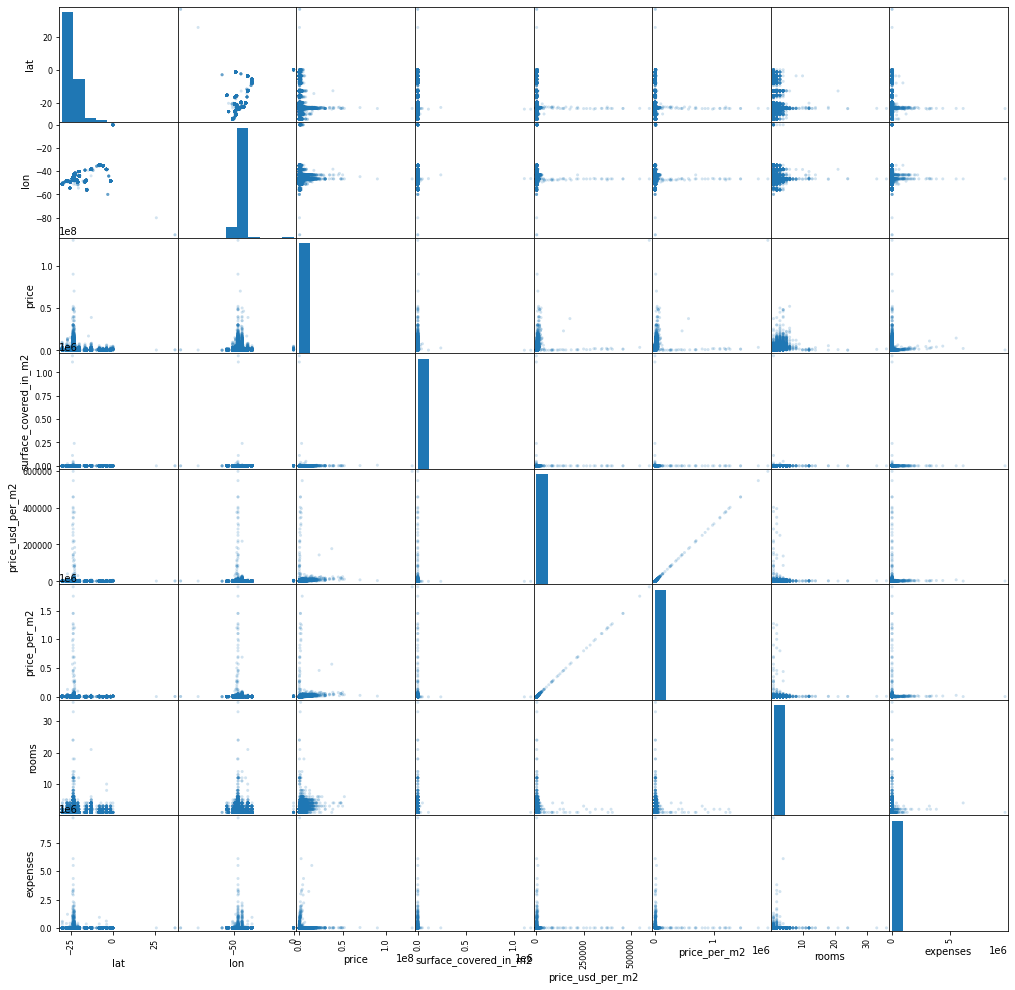

In [51]:
# the scatter matrix for sell data:
plot = pd.plotting.scatter_matrix(data_sell, alpha=0.2, figsize=(17, 17), diagonal='hist')
plt.show()

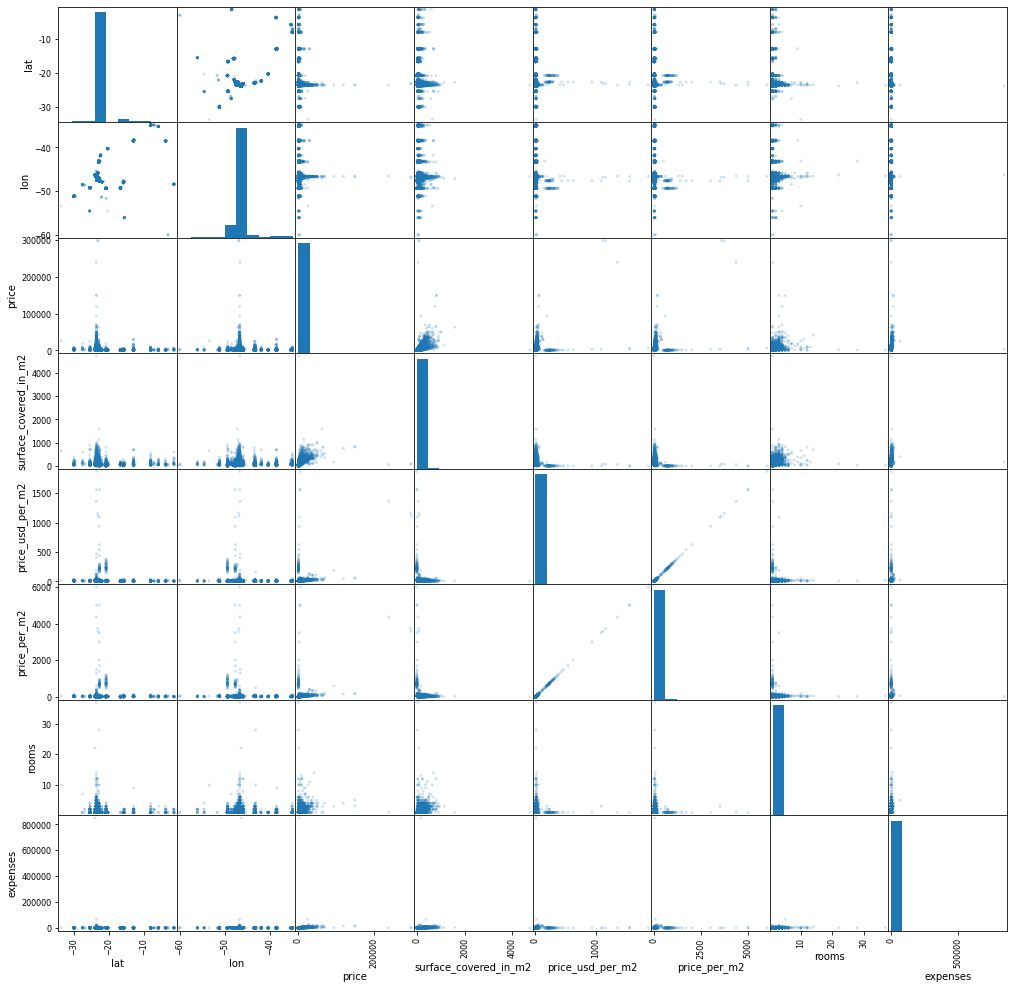

In [52]:
# scatter matrix for rent data:
plot = pd.plotting.scatter_matrix(data_rent, alpha=0.2, figsize=(17, 17), diagonal='hist')
plt.show()

## Building the model!
As mentioned earlier we will be using Keras.

#### Creating the Input Pipeline
First, let's merge both data frames for sell and rent. Then we have to make everything digestible to a model. 

In [53]:
data = data_sell.append(data_rent)

In [54]:
# Observe the data types. We want all the objects to be NUMERICAL
data.dtypes

created_on                 object
operation                  object
property_type              object
place_name                 object
lat-lon                    object
lat                       float64
lon                       float64
price                     float64
surface_covered_in_m2     float64
price_usd_per_m2          float64
price_per_m2              float64
rooms                     float64
expenses                  float64
geometry                 geometry
dtype: object

In [55]:
# created on
data['created_on'] = pd.Categorical(data['created_on'])
data['created_on'] = data.created_on.cat.codes
# operation
data['operation'] = pd.Categorical(data['operation'])
data['operation'] = data.operation.cat.codes
# property type
data['property_type'] = pd.Categorical(data['property_type'])
data['property_type'] = data.property_type.cat.codes
# drop place_name since we are not concerned with it at this point
del data['place_name']
# drop the geometry column since have longitude and latitude anyway
del data['geometry']
# drop lat-lon
del data['lat-lon']
# drop operation
del data['operation']
# drop property_type
del data['property_type']

In [56]:
# everything is now numerical and neat.
data.head()

,created_on,lat,lon,price,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,expenses
22056,0,-26.633144,-48.684662,120000.0,63.0,601.212540,1904.761905,2.0,130.0
22290,1,-23.600399,-46.710586,360000.0,70.0,1623.274143,5142.857143,3.0,600.0
37700,2,-23.624182,-46.676914,515000.0,50.0,3251.057200,10300.000000,1.0,420.0
37702,2,-20.844410,-49.393246,380000.0,112.0,1070.910000,3392.857143,3.0,465.0
37704,2,-20.842413,-49.403404,970000.0,157.0,1950.111656,6178.343949,3.0,650.0


In [57]:
# data
train, test = train_test_split(data, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
# define y data (dependent variable)
# since we are interested in valuation, let's go with price
y_train = train.pop('price')
y_val = val.pop('price')
y_test = test.pop('price')

In [58]:
dataset = tf.data.Dataset.from_tensor_slices(data)

In [59]:
train_dataset = tf.data.Dataset.from_tensor_slices((train, y_train))
#train_dataset = train_dataset.batch(32).repeat()
val_dataset = tf.data.Dataset.from_tensor_slices((val, y_val))
#val_dataset = val_dataset.batch(32).repeat()
test_dataset = tf.data.Dataset.from_tensor_slices((test, y_test))
#test_dataset = test_dataset.batch(32).repeat()

#### Feature Engineering
We now move on to the feature engineering phase.

In [60]:
feature_columns = []

In [61]:
dim = len(data)
keys = []
for entry in data:
    keys.append(entry)
    max_value = math.floor(data.loc[data[entry].idxmax()][entry])
    boundary1 = math.floor(max_value/4)
    boundary2 = math.floor(max_value/3)
    boundary3 = math.floor(max_value/2)
    boundaries=[boundary1,
                boundary2,
                boundary3,
                max_value]
    # remove duplicates
    boundaries = list(dict.fromkeys(boundaries))
    # create the numeric column
    numeric_column = tf.feature_column.numeric_column(entry) 
    feature_columns.append(tf.feature_column.bucketized_column(numeric_column, boundaries))

We now have our feature columns ready. We can now construct our feature layer.

In [94]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns, 
                                              dtype='float64',
                                             trainable=True,
                                             input_shape=[(8)])

### Experimentation Phase:

1.  Set up 1: No Feature Layer

    Sequential model without initial feature layer.

2. Set up 2: With Feature Layer


In [103]:
model = tf.keras.Sequential([
  layers.Dense(128, activation='relu'),
  layers.Dense(128, activation='relu'),
  layers.Dense(1)
])

In [97]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

Let's start with this.

In [99]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[(8)]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
model.build()

In [100]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_38 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 65        
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [101]:
# check if working
example_batch = train[:10]
example_result = model.predict(example_batch)
example_result

array([[ 905.0937  ],
       [        nan],
       [ 944.78674 ],
       [        nan],
       [ -10.395057],
       [ -11.058011],
       [2124.8193  ],
       [ 911.02014 ],
       [        nan],
       [1287.0447  ]], dtype=float32)

In [102]:
EPOCHS = 10

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer='adam',
              metrics=['mse'])

history = model.fit(
  train, y_train,
  epochs=EPOCHS, validation_split = 0.2, verbose=0)

print(history.history)

{'loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'mse': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_loss': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], 'val_mse': [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]}


#### Results for Set up # 1:
This is quite bad! There is nothing to be gathered from the results. 